In [1]:
import fonction as f
from IPython.display import display, Audio


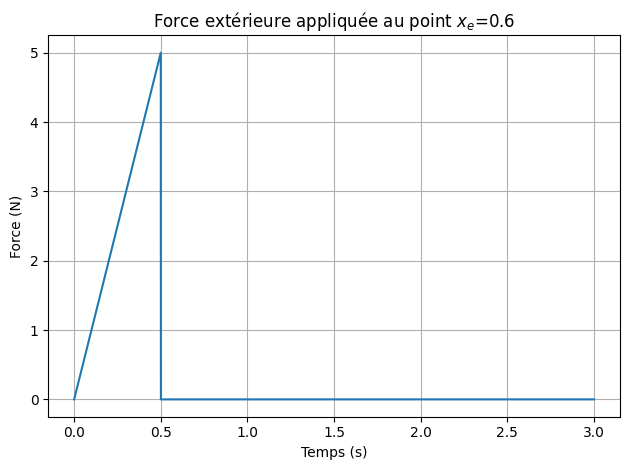

In [2]:
MS,CS,KS, phiS_Nx_NmS,NmS,xS = f.corde()
t,FextS_NxS_Nt = f.Simu_config(xS,Fe=40000, T=3)

In [3]:
MB_ar,CB_ar,KB_ar,phiB_NxNy_NmB_ar,NmB_ar = f.plaque_article()

In [4]:
MB_mod,CB_mod,KB_mod,phiB_NxNy_NmB_mod,NmB_mod,x,y= f.plaque_model()

Fréquence du dernier mode de plaque calculé : 2061 Hz


In [5]:
M_ar,K_ar,C_ar = f.créer_matrice(MS,MB_ar,KS,KB_ar,CS,CB_ar)
M_mod,K_mod,C_mod = f.créer_matrice(MS,MB_mod,KS,KB_mod,CS,CB_mod)

In [6]:
W_ar_a2,Z_ar_a2 = f.UK_params(M_ar,NmS, NmB_ar, phiS_Nx_NmS, phiB_NxNy_NmB_ar, article = True, model = False, mode = 'A2',x =0, y = 0)
W_ar_a1,Z_ar_a1 = f.UK_params(M_ar,NmS, NmB_ar, phiS_Nx_NmS, phiB_NxNy_NmB_ar, article = True, model = False, mode = 'A1',x =0, y = 0)
W_mod_a2,Z_mod_a2 = f.UK_params(M_mod,NmS, NmB_mod, phiS_Nx_NmS, phiB_NxNy_NmB_mod, article = False, model = True, mode = 'A2',x = x, y = y)
W_mod_a1,Z_mod_a1 = f.UK_params(M_mod,NmS, NmB_mod, phiS_Nx_NmS, phiB_NxNy_NmB_mod, article = False, model = True, mode = 'A1',x = x, y = y)

In [7]:
Q_ar_a1,F_C_ar_a1 = f.lounch_simu_article(t,FextS_NxS_Nt,phiS_Nx_NmS,NmS,NmB_ar,M_ar,C_ar,K_ar,Z_ar_a1,W_ar_a1)
Q_ar_a2,F_C_ar_a2 = f.lounch_simu_article(t,FextS_NxS_Nt,phiS_Nx_NmS,NmS,NmB_ar,M_ar,C_ar,K_ar,Z_ar_a2,W_ar_a2)

In [8]:
Q_mod_a1,F_C_mod_a1 = f.lounch_simu_article(t,FextS_NxS_Nt,phiS_Nx_NmS,NmS,NmB_mod,M_mod,C_mod,K_mod,Z_mod_a1,W_mod_a1)
Q_mod_a2,F_C_mod_a2 = f.lounch_simu_article(t,FextS_NxS_Nt,phiS_Nx_NmS,NmS,NmB_mod,M_mod,C_mod,K_mod,Z_mod_a2,W_mod_a2)

In [9]:
def écouter_son(F,phiS_Nx_NmS,phiB_NxNy_NmB,NmS,Fe=44100):
    FS = F[:NmS,:]
    FB = F[NmS:,:]
    FS_NxS_Nt = phiS_Nx_NmS @ FS
    FB_NxNy_Nt = phiB_NxNy_NmB @ FB
    display(Audio(FS_NxS_Nt[-1,:], rate=Fe))


In [10]:
écouter_son(F_C_ar_a1,phiS_Nx_NmS,phiB_NxNy_NmB_ar,NmS)

In [11]:
écouter_son(F_C_ar_a2,phiS_Nx_NmS,phiB_NxNy_NmB_ar,NmS)

In [12]:
écouter_son(F_C_mod_a1,phiS_Nx_NmS,phiB_NxNy_NmB_mod,NmS)

In [13]:
écouter_son(F_C_mod_a2,phiS_Nx_NmS,phiB_NxNy_NmB_mod,NmS)